Dostępne dane na temat produktów o ID:
44265107
13029872
22496575
Podaj kod produktu: 
22496575

O produkcie dostępnych jest 194 opinii.
W 83 opiniach podana została lista zalet produkty, a w 28 lista wad. 
Średnia ocena produktu wyznaczona na podstawie liczby gwiazdek w opiniach wynosi 4.6.
Produkt zakupiony pierwszy raz 2013-11-29. Ostatni dokonany zakup miał miejsce 2021-04-13.
Procent opinii potwierdzonych zakupem wynosi 73.71%.
Liczba wymienionych zalet przez wszystkich użytkowników to 776, natomiast wad 47.

Treść najprzydatniejszej opinii:
 'dość długi czas przeglądałem różne rodzaje odkurzaczy w różnych przedziałach cenowych. Zależało mi na urządzeniu z funkcją prania. Dodatkowo posiadając w domu pupila padło na THOMASa. Zaczynając od funkcji prania dywanów(niestety trudno uzyskać jakiekolwiek opinie w tej kwestii) stwierdzam, że stosunek ceny do jakości jest bardzo dobry. Wg mnie najważniejszym parametrem jest siła ssania która jest na prawdę bardzo dobra a  odpowiedzialna jes

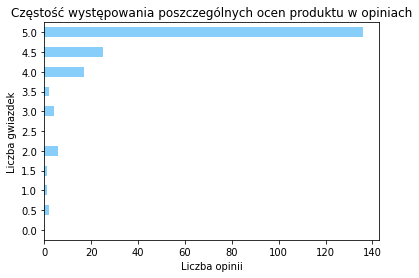

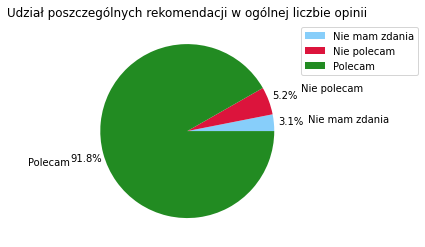

rcmd   Nie mam zdania  Nie polecam  Polecam
stars                                      
0.5                 0            2        0
1.0                 0            1        0
1.5                 0            1        0
2.0                 0            6        0
3.0                 4            0        0
3.5                 2            0        0
4.0                 0            0       17
4.5                 0            0       25
5.0                 0            0      136



purchased  False  True 
stars                  
0.5            2      0
1.0            1      0
1.5            0      1
2.0            6      0
3.0            4      0
3.5            1      1
4.0            5     12
4.5            7     18
5.0           25    111


In [37]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dateutil import parser

pd.set_option('display.max_columns', None)

print("Dostępne dane na temat produktów o ID:")
print(*[str(x).split('.')[0] for x in os.listdir("opinions") if x[0] != '.'], sep='\n')

productId = input("Podaj kod produktu: \n")
opinions = pd.read_json(f"./opinions/{productId}.json")

opinions.stars = opinions.stars.apply(lambda x: float(x.split("/")[0].replace(",", ".")))
opinions.rcmd = opinions.rcmd.apply(lambda x: "Nie mam zdania" if x is None else x)

purchase = opinions.purchaseDate.values.tolist()
parsedPurchaseDates = [parser.parse(p) for p in purchase if p]

opinionsCount = len(opinions)
prosCount = opinions.pros.astype(bool).sum()
consCount = opinions.cons.astype(bool).sum()
averageScore = opinions.stars.mean()
firstBought = min(parsedPurchaseDates).date()
lastBought = max(parsedPurchaseDates).date()
confirmedByPurchase = round(100 * opinions.purchased.count() / opinionsCount, 2)
sumOfPros = sum(map(lambda x: len(x), opinions.pros.values))
sumOfCons = sum(map(lambda x: len(x), opinions.cons.values))

print(f'''\nO produkcie dostępnych jest {opinionsCount} opinii.
W {prosCount} opiniach podana została lista zalet produkty, a w {consCount} lista wad. 
Średnia ocena produktu wyznaczona na podstawie liczby gwiazdek w opiniach wynosi {averageScore:.1f}.
Produkt zakupiony pierwszy raz {firstBought}. Ostatni dokonany zakup miał miejsce {lastBought}.
Procent opinii potwierdzonych zakupem wynosi {confirmedByPurchase}%.
Liczba wymienionych zalet przez wszystkich użytkowników to {sumOfPros}, natomiast wad {sumOfCons}.\n''')

print(f"Treść najprzydatniejszej opinii:\n '{opinions.iat[opinions.useful.idxmax(), 3]}'")

stars = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
stars.plot.barh(color = 'lightskyblue')
plt.title("Częstość występowania poszczególnych ocen produktu w opiniach")
plt.xlabel("Liczba opinii")
plt.ylabel("Liczba gwiazdek")
plt.savefig(f"./figures/{productId}_stars.png", bbox_inches="tight")
plt.show()
plt.close()

recommendations = opinions.rcmd.value_counts(dropna = False).sort_index()
recommendations.plot.pie(
    label="",
    colors = ['lightskyblue', 'crimson', 'forestgreen'],
    autopct = "%1.1f%%",
    pctdistance = 1.2,
    labeldistance = 1.4
)
plt.title('Udział poszczególnych rekomendacji w ogólnej liczbie opinii')
plt.legend(bbox_to_anchor = (1.0,1.0))
plt.savefig(f"./figures/{productId}_rcmd.png", bbox_inches="tight")
plt.show()
plt.close()

stars_rcmd = pd.crosstab(opinions.stars, opinions.rcmd.fillna('None'))
print(stars_rcmd)

print('\n\n')

d = {'Opinia potwierdzona zakupem': True, None: False}
stars_cons = pd.crosstab(opinions.stars, opinions.purchased.replace(d))
print(stars_cons)


In [44]:
# print(type(opinions.pros))
# print(list(opinions.pros))
# print(list(opinions.cons))

import functools

allPros = functools.reduce(lambda x, y: x + y, list(opinions.pros))
allCons = functools.reduce(lambda x, y: x + y, list(opinions.cons))

def reduce(lst):
    d = {}

    for pros in lst:
        if pros in d:
            d[pros] += 1
        else:
            d[pros] = 1

    return d

sumPros, sumCons = reduce(allPros), reduce(allCons)

print(sumPros, sumCons)

{'bardzo zwrotny': 13, 'cena&jakość': 14, 'łatwość mycia pojemnika filtra': 12, 'nie wydziela zapachu podczas odkurzania': 10, 'pojemnik na worek': 9, 'przemyślana niemiecka jakość wykonania': 8, 'świeże powietrze': 9, 'trwałość': 11, 'turboszczotka w standardzie': 14, 'jakość': 41, 'jakość wykonania': 42, 'moc': 53, 'szczotka do usuwania sierści': 21, 'brak nieprzyjemnych zapachów': 28, 'długość kabla': 50, 'dobra siła ssania': 28, 'szczotki': 37, 'odkurza brud': 21, 'włosy': 21, 'płyny': 21, 'duża skuteczność odkurzania': 20, 'idealnie usuwa sierść kota i psa.': 23, 'możliwość  odkurzania z workiem': 18, 'siła ssania': 17, 'wygląd': 27, 'wyposażenie': 26, 'odświeża powietrze': 16, 'zbiera wszystko': 15, 'koniec z włosami': 15, 'filtr hepa który nie jest uwzględniony': 2, 'funkcja prania': 11, 'głośność pracy': 30, 'cena': 5, 'zwinny': 11, 'doskonale odkurza i pierze.': 17, 'materiał i jakośc wykonania': 17, 'urządzenie jest poręczne i estetyczne.': 7, 'długi zasięg kabla i rury': 7, 

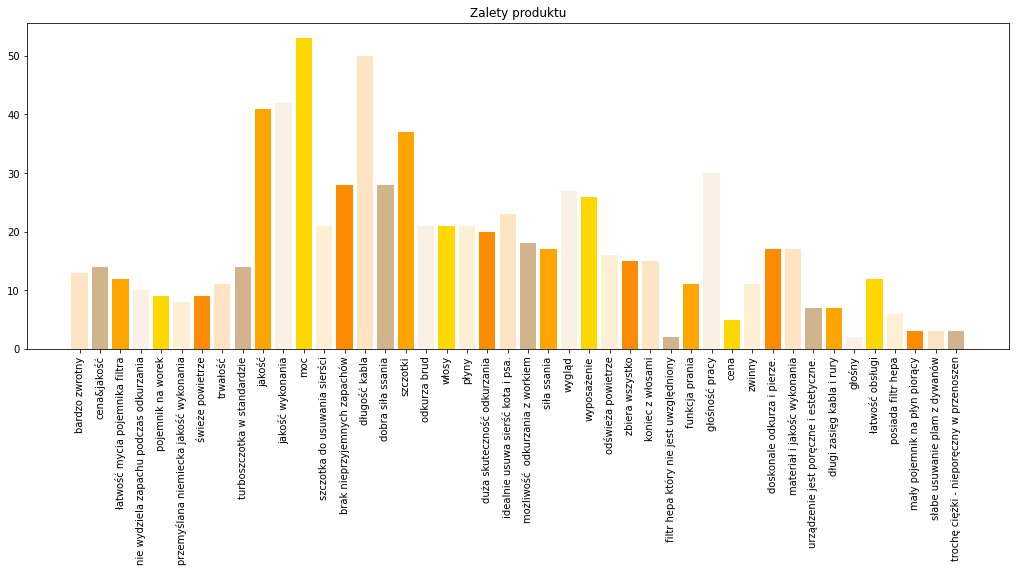

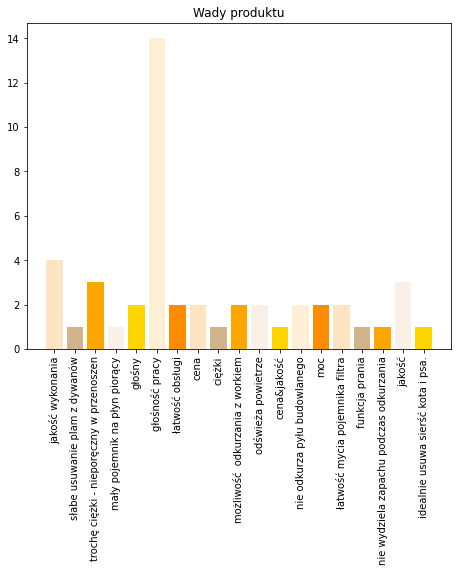

In [51]:
colors = ['bisque', 'tan', 'orange', 'linen', 'gold', 'papayawhip', 'darkorange']

plt.figure(figsize=(8/20*len(sumPros.keys()), 6))
plt.xticks(rotation=90)
plt.title('Zalety produktu')
plt.bar(sumPros.keys(), sumPros.values(), color=colors)
plt.savefig(f"./figures/{productId}_pros.png", bbox_inches="tight")

plt.show()
plt.close()

plt.figure(figsize=(8/20*len(sumCons.keys()), 6))
plt.xticks(rotation=90)
plt.title('Wady produktu')
plt.bar(sumCons.keys(), sumCons.values(), color=colors)
plt.savefig(f"./figures/{productId}_cons.png", bbox_inches="tight")

plt.show()
plt.close()